# Patient Satisfaction in Macedonia - Analysis

## Introduction
In this analysis, we explore patient satisfaction within the healthcare delivery system in Macedonia based on survey data from 2018. Our primary objectives are to assess overall patient satisfaction, identify key factors influencing this satisfaction, and uncover correlations between these factors.

Through exploratory data analysis (EDA) and data visualization techniques, we examine relationships between various aspects of healthcare services and overall patient satisfaction. 

By the end of this analysis, we aim to provide actionable recommendations for improving patient experiences in the Macedonian healthcare system, based on the insights gained from the data.


## Importing Necessary Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset:

In [2]:
df=pd.read_csv('datasetsatisfaction.csv')

In [3]:
df.head()

,satisfaction in RM,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience dr.,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0
3,2.0,2.0,4.0,1.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,5.0,4.0,1.0,1.0
4,3.0,4.0,1.0,1.0,2.0,1.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,1.0,1.0,1.0


As we can see,the column for quality/experience ratings is misnamed,we will correct that,and work on further processing of the data:

In [4]:
df.rename(columns={'Quality/experience dr.':'Quality/experience'},inplace=True)
df.head() #Check to see if changes applied

,satisfaction in RM,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0
3,2.0,2.0,4.0,1.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,5.0,4.0,1.0,1.0
4,3.0,4.0,1.0,1.0,2.0,1.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,1.0,1.0,1.0


## Rating System Clarification

The dataset employs a rating system that may lead to confusion in interpretation. In this system, the ratings are assigned as follows:

- 1: Very Satisfied
- 2: Satisfied
- 3: Neutral
- 4: Unsatisfied
- 5: Very Unsatisfied

This scale assigns higher numerical values to lower levels of satisfaction, which can be counterintuitive for analysis. To enhance clarity and improve the interpretability of the data, we will reverse this rating scale. After the reversal, the ratings will reflect that higher values correspond to higher satisfaction ratings:

- 1 (previously Very Satisfied) will become 5
- 2 (Satisfied) will become 4
- 3 (Neutral) will remain 3
- 4 (Unsatisfied) will become 2
- 5 (Very Unsatisfied) will become 1

By reversing the scale, we aim to create a more intuitive framework for analyzing overall patient satisfaction in the healthcare delivery system in Macedonia.

IMPORTANT NOTE: The "satisfaction in RM" column will be left as it is because it is a different scale where 1: Yes,2: No,and 3: Partly.
## Reversing the Scale:

In [5]:
columns_to_reverse = ['Check up appointment','Time waiting',
       'Admin procedures','Hygiene and cleaning','Time of appointment',
       'Quality/experience','Specialists avaliable',
       'Communication with dr','Exact diagnosis','Modern equipment',
       'friendly health care workers','lab services', 'avaliablity of drugs',
       'waiting rooms','hospital rooms quality',
       'parking, playing rooms, caffes']
for col in columns_to_reverse:
    df[col]=6-df[col]  # This reverses the scale

#Check the first 5 rows to confirm changes
df.head()

,satisfaction in RM,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,2.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0
2,2.0,5.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0
3,2.0,4.0,2.0,5.0,5.0,4.0,2.0,5.0,5.0,2.0,5.0,5.0,2.0,1.0,2.0,5.0,5.0
4,3.0,2.0,5.0,5.0,4.0,5.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,5.0,5.0,5.0


Now that the scale is reversed and the data is clearer,let's get a statistical summary:

In [6]:
df.describe()

,satisfaction in RM,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,2.435841,3.373894,3.482301,3.404867,3.227876,3.424779,3.075221,3.325221,3.185841,3.170354,3.493363,3.170354,3.243363,3.254425,3.331858,3.285398,3.256637
std,0.526755,1.464897,1.407029,1.370346,1.264849,1.442499,1.522516,1.412011,1.443995,1.502314,1.300674,1.401522,1.470501,1.385498,1.242468,1.222646,1.157478
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.750000,3.000000,3.000000
50%,2.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.500000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000
max,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Insights from the Statistical Summary:

- Mixed Experiences: The average satisfaction score is around 3.0, indicating a neutral to slightly dissatisfied view among patients.

- High Variability: The high standard deviations suggest significant differences in patient experiences—some are satisfied while others are quite unhappy.

- Full Range of Responses: The data shows that responses span from 1 (very satisfied) to 5 (very unsatisfied), reflecting both ends of the satisfaction spectrum.

- Focus Areas: Many categories, like waiting times and admin procedures, have means indicating dissatisfaction, pointing to key areas for improvement.

Next Step:

To better understand overall patient satisfaction, we will create a plot of the "satisfaction in RM" column. This will help us identify trends and patterns in patient feedback more clearly.

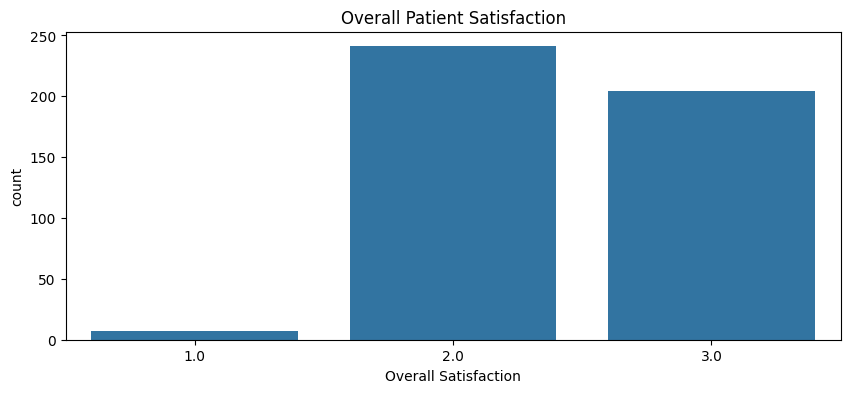

In [7]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['satisfaction in RM'])
plt.title('Overall Patient Satisfaction')
plt.xlabel('Overall Satisfaction')
plt.show()

It appears that most patients in the survey are dissatisfied with the healthcare delivery system in Macedonia. Moving forward, we’ll conduct targeted analyses using visualizations addressing specific factors in relation to overall satisfaction. These will help us uncover deeper insights into the satisfaction drivers in the Macedonian healthcare system.

It's essential to consider that our dataset consists of only 452 responses, so we should interpret these findings cautiously.

## Quality/Experience assessment:

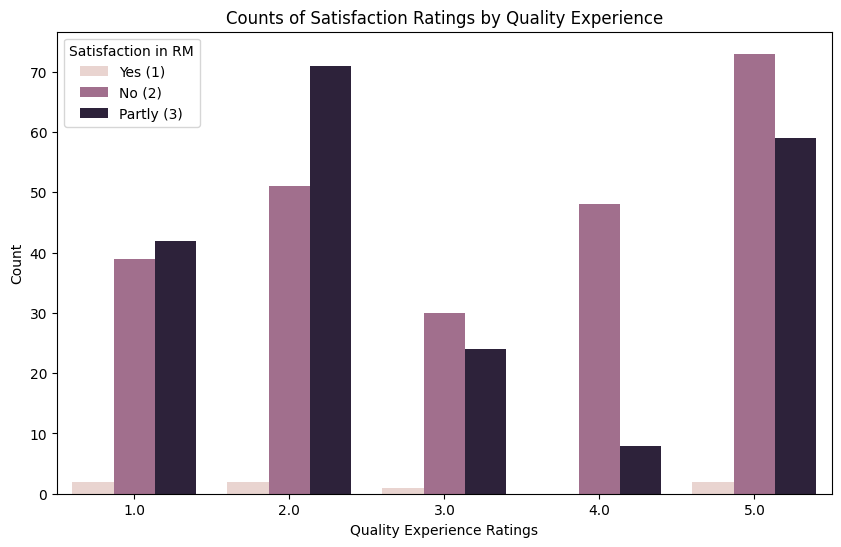

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Quality/experience',hue='satisfaction in RM',data=df)
plt.title('Counts of Satisfaction Ratings by Quality Experience')
plt.xlabel('Quality Experience Ratings')
plt.ylabel('Count')
plt.legend(title='Satisfaction in RM',loc='upper left',labels=['Yes (1)', 'No (2)', 'Partly (3)'])
plt.show()

The results show a strange trend: many patients who rated their quality of experience highly (5) also reported dissatisfaction (2) in overall satisfaction. This suggests that high ratings in one area don't necessarily mean overall approval, hinting at possible gaps between expectations and reality. As we dive into the next visualizations and address other factors, we aim to uncover more about these complexities.

## Waiting Times vs. Overall Satisfaction:

We’ll begin with a pivot table that shows the counts of satisfaction ratings for each waiting time. This will help us understand the data before we look at the stacked bar chart that visualizes these relationships

Pivot table:


satisfaction in RM,1.0,2.0,3.0
Time waiting,,,
1.0,2,26,19
2.0,2,40,49
3.0,1,45,23
4.0,0,57,30
5.0,2,73,83


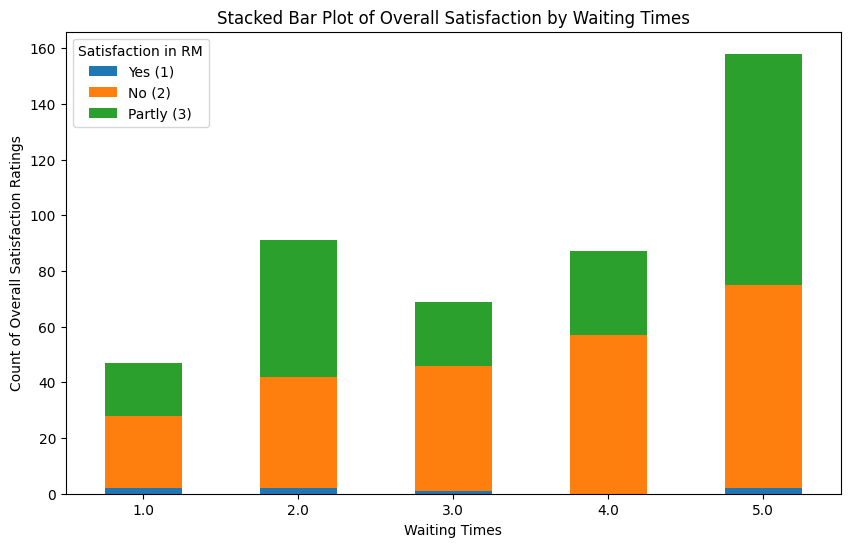

In [9]:
pivot_waiting = df.pivot_table(index='Time waiting', columns='satisfaction in RM', aggfunc='size', fill_value=0)
print("Pivot table:")
display(pivot_waiting)

# Plotting
pivot_waiting.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Overall Satisfaction by Waiting Times')
plt.xlabel('Waiting Times')
plt.ylabel('Count of Overall Satisfaction Ratings')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction in RM', labels=['Yes (1)', 'No (2)', 'Partly (3)'])
plt.show()


Again we see an odd trend: patients who rated their waiting times higher (4.0 and 5.0) often reported dissatisfaction (rating 2) in overall satisfaction. This suggests that feeling good about waiting times doesn't guarantee a positive overall experience. The stacked bar chart supports this, highlighting persistent dissatisfaction despite high waiting time ratings.Let's address some more factors to find more information.

## Check up appointment vs. Overall satisfaction

satisfaction in RM,1.0,2.0,3.0
Check up appointment,,,
1.0,1,36,23
2.0,3,38,51
3.0,1,47,30
4.0,0,44,19
5.0,2,76,81


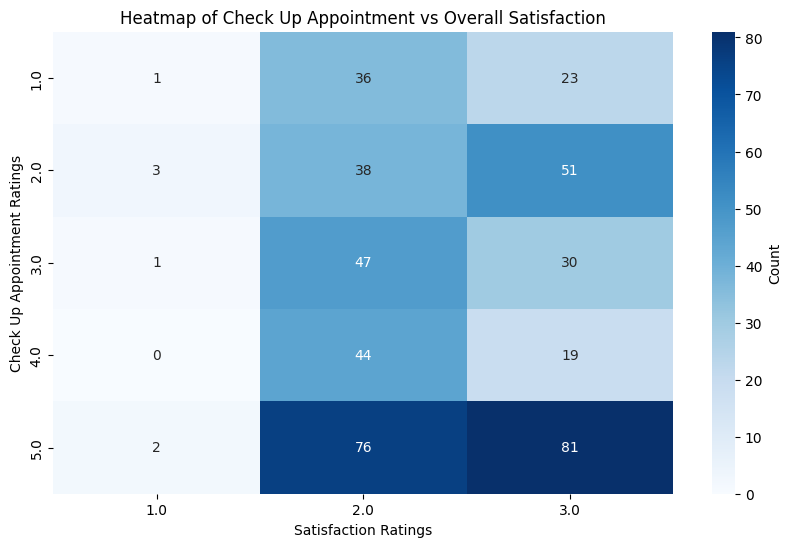

In [10]:
pivot_heatmap = df.pivot_table(index='Check up appointment',columns='satisfaction in RM',aggfunc='size',fill_value=0)

display(pivot_heatmap)

# Creating a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_heatmap,annot=True,fmt='d',cmap='Blues',cbar_kws={'label': 'Count'})
plt.title('Heatmap of Check Up Appointment vs Overall Satisfaction')
plt.xlabel('Satisfaction Ratings')
plt.ylabel('Check Up Appointment Ratings')
plt.show()

While higher ratings for check-up appointments often link to greater overall satisfaction, it’s surprising that many patients still express dissatisfaction even with good appointment ratings. This highlights the complexity of patient satisfaction.

It seems we’ve found a common theme across multiple factors: that patient satisfaction is multifaceted and not solely determined by one aspect, like appointment ratings or waiting times. This consistent observation reinforces the idea that understanding patient experiences requires looking at a broader range of influences.To gain a deeper understanding, we will create a correlation matrix and heatmap to uncover patterns and relationships between the various factors contributing to this dissatisfaction.

## Correlation matrix and heatmap:

,satisfaction in RM,Check up appointment,Time waiting,Admin procedures,Hygiene and cleaning,Time of appointment,Quality/experience,Specialists avaliable,Communication with dr,Exact diagnosis,Modern equipment,friendly health care workers,lab services,avaliablity of drugs,waiting rooms,hospital rooms quality,"parking, playing rooms, caffes"
satisfaction in RM,1.000000,0.032594,0.047827,0.074463,0.070248,0.044701,-0.115617,-0.024053,-0.010525,-0.113645,0.099702,0.046373,-0.002698,-0.006446,0.066484,0.054316,0.048886
Check up appointment,0.032594,1.000000,0.559921,0.494372,0.510370,0.568945,0.452627,0.466342,0.486994,0.384079,0.448755,0.434380,0.384834,0.392200,0.431153,0.454053,0.387897
Time waiting,0.047827,0.559921,1.000000,0.566640,0.508728,0.588178,0.469498,0.487826,0.530916,0.499162,0.488808,0.463098,0.403957,0.411212,0.453627,0.448258,0.397621
Admin procedures,0.074463,0.494372,0.566640,1.000000,0.570927,0.610504,0.416848,0.369542,0.485184,0.344465,0.496006,0.517014,0.419742,0.396416,0.505640,0.498622,0.500503
Hygiene and cleaning,0.070248,0.510370,0.508728,0.570927,1.000000,0.588487,0.384855,0.414043,0.432013,0.373929,0.520488,0.529652,0.396897,0.416010,0.566930,0.597321,0.514276
Time of appointment,0.044701,0.568945,0.588178,0.610504,0.588487,1.000000,0.439736,0.451289,0.533650,0.393196,0.462403,0.549793,0.458130,0.413986,0.498922,0.437764,0.473728
Quality/experience,-0.115617,0.452627,0.469498,0.416848,0.384855,0.439736,1.000000,0.613619,0.606824,0.649697,0.358550,0.413782,0.426577,0.363007,0.351307,0.352929,0.340058
Specialists avaliable,-0.024053,0.466342,0.487826,0.369542,0.414043,0.451289,0.613619,1.000000,0.619515,0.599936,0.464179,0.448126,0.407101,0.395099,0.441362,0.470133,0.454855
Communication with dr,-0.010525,0.486994,0.530916,0.485184,0.432013,0.533650,0.606824,0.619515,1.000000,0.660988,0.465800,0.607727,0.446465,0.409654,0.448774,0.418250,0.435717
Exact diagnosis,-0.113645,0.384079,0.499162,0.344465,0.373929,0.393196,0.649697,0.599936,0.660988,1.000000,0.417595,0.473764,0.479020,0.428672,0.417481,0.404425,0.377739


<Axes: >

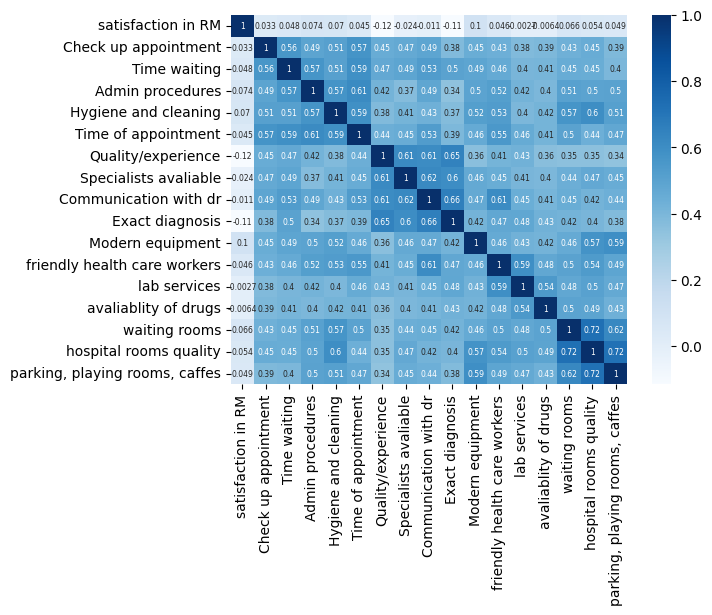

In [11]:
corr=df.corr()
display(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap='Blues',annot=True,annot_kws={"size": 5.5})

The correlation matrix reveals key insights into patient satisfaction. A strong positive link between Check Up Appointment ratings and both Time Waiting and Admin Procedures suggests that better appointment experiences lead to shorter waits and smoother processes.

The Quality/Experience factor is particularly important, indicating that how patients feel about their overall care significantly impacts satisfaction. The negative correlation here shows there might be some inconsistencies in patient experiences that need addressing.

Additionally, factors like Hygiene and Cleaning, Friendly Healthcare Workers, and Modern Equipment all positively affect satisfaction, highlighting the importance of a clean environment and attentive staff.

# Conclusion:
This analysis shows that patient satisfaction is complex and shaped by many interconnected factors. No single aspect—like appointment ratings or waiting times—can stand alone. To truly enhance patient experiences, healthcare providers should take a comprehensive approach that addresses these diverse areas. By improving communication, hygiene, and the overall environment, providers can create a more satisfying experience for patients and boost overall satisfaction.